# Perform text-to-image generation
Encode text from [Rubin et al. (2016)](http://www.biorxiv.org/content/early/2016/06/18/059618) into images.

In [1]:
%matplotlib inline
from os.path import join

import nibabel as nib
from nilearn import plotting

from gclda.model import Model
from gclda.decode import Decoder
from gclda.utils import get_resource_path
from gclda.utils import plot_brain

/Users/tsalo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# Load example model and initialize decoder
model = Model.load(join(get_resource_path(), 'models',
                        'Neurosynth2015Filtered2',
                        'model_200topics_2015Filtered2.pkl'))
decoder = Decoder(model)

model.display_model_summary()

--- Model Summary ---
 Current State:
	 Current Iteration   = 1000
	 Initialization Seed = 1
	 Current Log-Likely  = -10981413.4523
 Model Hyper-Parameters:
	 Symmetric = 0.1
	 n_topics  = 200
	 n_regions = 2
	 alpha     = 0.010
	 beta      = 0.010
	 gamma     = 1.000
	 delta     = 25.000
	 roi_size  = 1.000
	 dobs      = 50
 Model Training-Data Information:
	 Dataset Label                 = 2015Filtered2
	 Word-Tokens (n_word_tokens)   = 520492
	 Peak-Tokens (n_peak_tokens)   = 400801
	 Word-Types (n_word_labels)    = 6755
	 Documents (n_docs)            = 11362
	 Peak-Dimensions (n_peak_dims) = 3


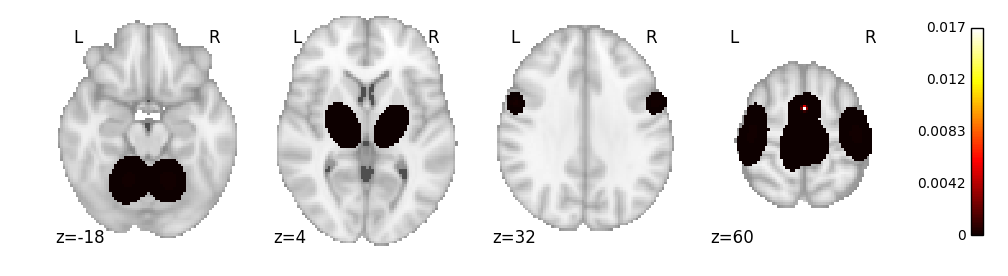

In [3]:
text = 'motor'
text_arr = decoder.encode(text)
underlay = model.dataset.masker.volume
text_img = nib.Nifti1Image(text_arr, underlay.affine)
fig = plotting.plot_stat_map(text_img, display_mode='z', 
                             threshold=0.00001,
                             cut_coords=[-18, 4, 32, 60])

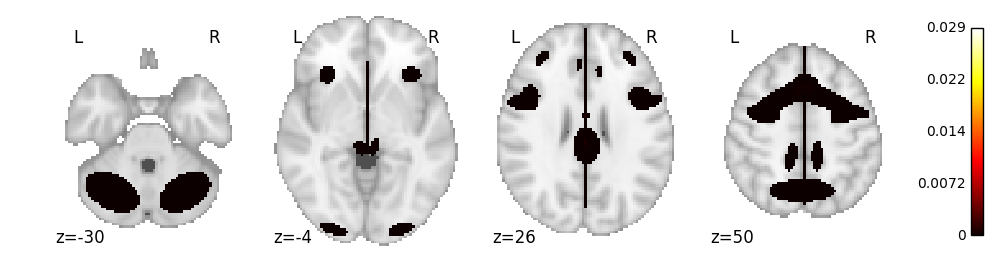

In [4]:
text = 'effort difficult demands'
text_arr = decoder.encode(text)
underlay = model.dataset.masker.volume
text_img = nib.Nifti1Image(text_arr, underlay.affine)
fig = plotting.plot_stat_map(text_img, display_mode='z', 
                             threshold=0.00001,
                             cut_coords=[-30, -4, 26, 50])

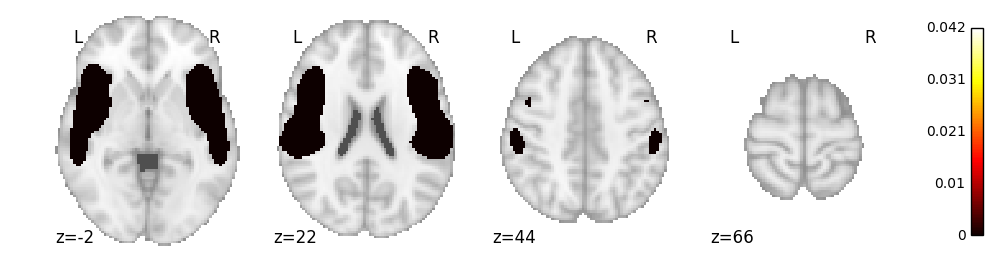

In [5]:
text = 'painful stimulation during a language task'
text_arr = decoder.encode(text)
underlay = model.dataset.masker.volume
text_img = nib.Nifti1Image(text_arr, underlay.affine)
fig = plotting.plot_stat_map(text_img, display_mode='z', 
                             threshold=0.00001,
                             cut_coords=[-2, 22, 44, 66])